# 1. Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('loan.csv')

# 2. Data description

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Exploratory data analysis

In [8]:
def plot(col):
  sns.countplot(x = col, hue = 'Loan_Status', data = df)

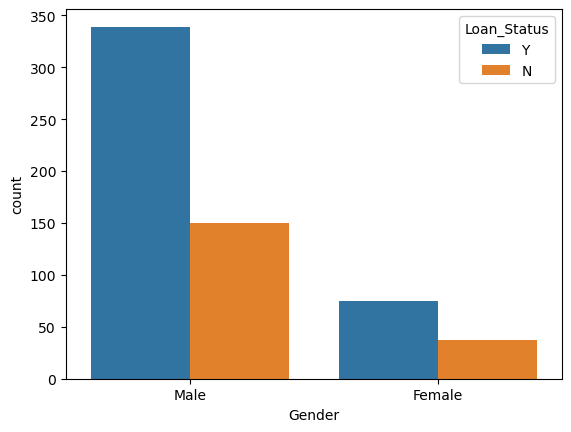

In [9]:
plot('Gender')

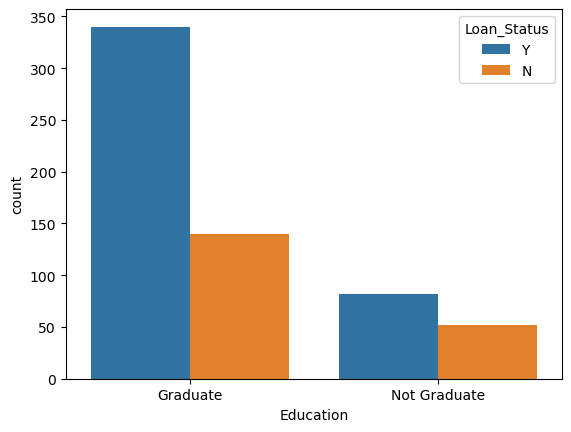

In [10]:
plot('Education')

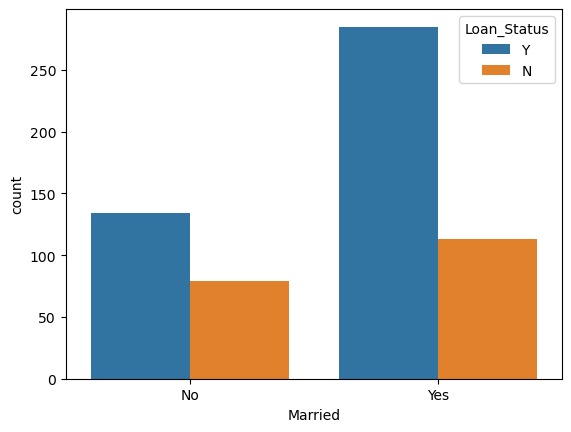

In [11]:
plot('Married')

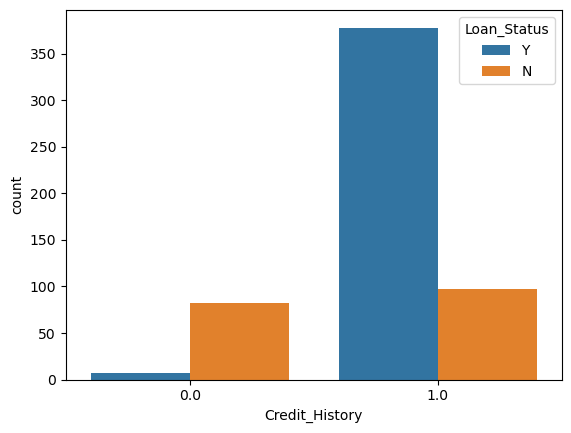

In [12]:
plot('Credit_History')

## 4. Dealing with missing values

In [13]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
#filling the data for features having missing values > 5%
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [15]:
#dropping data for features with missing values < 5%
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Normalizing the data

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

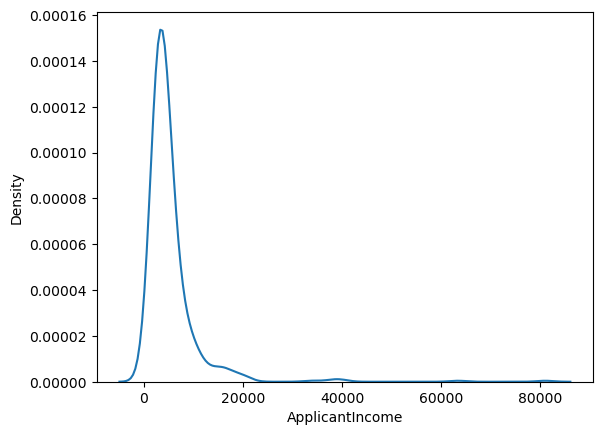

In [17]:
sns.kdeplot(df.ApplicantIncome)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

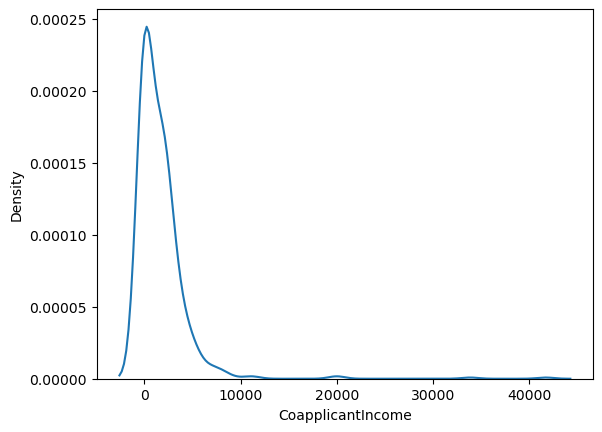

In [18]:
sns.kdeplot(df.CoapplicantIncome)

<Axes: xlabel='LoanAmount', ylabel='Density'>

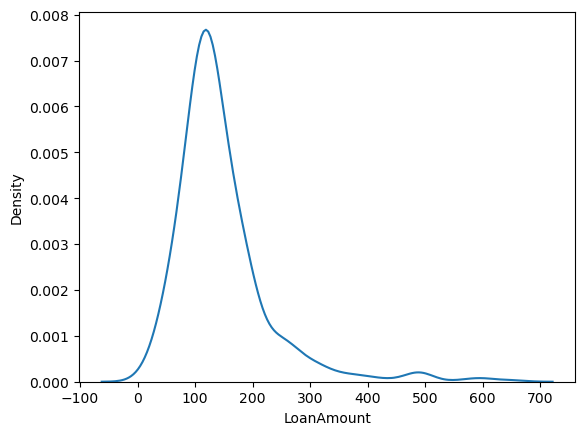

In [19]:
sns.kdeplot(df.LoanAmount)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

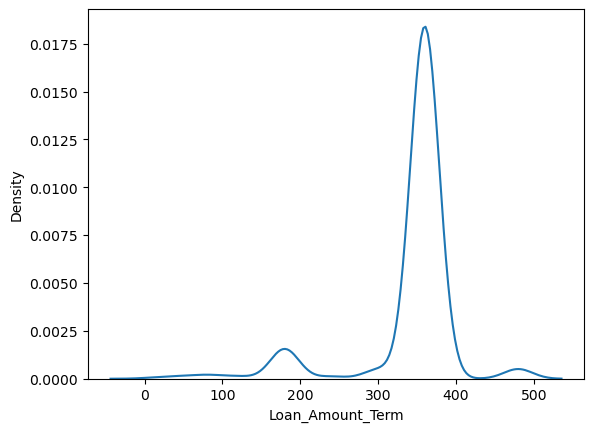

In [20]:
sns.kdeplot(df.Loan_Amount_Term)

<Axes: ylabel='Density'>

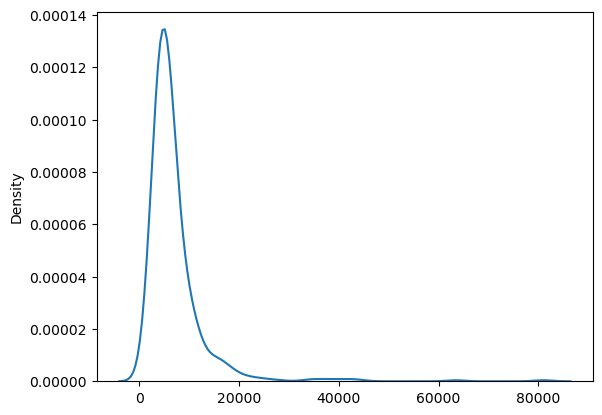

In [21]:
Total_income = df.ApplicantIncome + df.CoapplicantIncome
# we made this new feature because loan approval depends on the total income of the family.
sns.kdeplot(Total_income)

In [22]:
# as all above drawn graphs are either right skewed or left skewed 
#so we need to normalize the data in order to get more accurate results.

In [23]:
Log_loanamount = np.log(df.LoanAmount)
Log_loanamountterm = np.log(df.Loan_Amount_Term)
Log_totalincome = np.log(Total_income)

In [24]:
df = df.assign(log_totalincome = Log_totalincome)
df = df.assign(log_loanamount = Log_loanamount)
df = df.assign(log_loanamountterm = Log_loanamountterm)

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_totalincome', 'log_loanamount', 'log_loanamountterm'],
      dtype='object')

In [26]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID']
df = df.drop(col, axis = 1)

In [27]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'log_totalincome',
       'log_loanamount', 'log_loanamountterm'],
      dtype='object')

## Converting data into array

In [28]:
col = ['Loan_Status']
x = df.drop(col, axis = 1)
y = df.Loan_Status

In [29]:
X = x.iloc[:,:].values
Y = np.array(y)

In [30]:
X

array([['Male', 'Yes', '1', ..., 8.714567550836485, 4.852030263919617,
        5.886104031450156],
       ['Male', 'Yes', '0', ..., 8.006367567650246, 4.189654742026425,
        5.886104031450156],
       ['Male', 'Yes', '0', ..., 8.50532301884575, 4.787491742782046,
        5.886104031450156],
       ...,
       ['Male', 'Yes', '1', ..., 9.025455532779063, 5.53338948872752,
        5.886104031450156],
       ['Male', 'Yes', '2', ..., 8.933664178700935, 5.231108616854587,
        5.886104031450156],
       ['Female', 'No', '0', ..., 8.430109084509125, 4.890349128221754,
        5.886104031450156]], dtype=object)

In [31]:
X.shape

(553, 10)

In [32]:
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

## Label encoding

In [33]:
le = LabelEncoder()

In [34]:
for i in range(0,10):
    X[:,i] = le.fit_transform(X[:,i])

In [35]:
Y = le.fit_transform(Y)

## Feature scaling

In [36]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [37]:
X

array([[ 0.48127522,  0.73511222,  0.23330784, ...,  0.37019928,
        -0.11941535,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ..., -1.48885266,
        -1.32087679,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ..., -0.24714627,
        -0.29417338,  0.30417021],
       ...,
       [ 0.48127522,  0.73511222,  0.23330784, ...,  1.00157541,
         1.62816493,  0.30417021],
       [ 0.48127522,  0.73511222,  1.2257635 , ...,  0.87530019,
         0.97282232,  0.30417021],
       [-2.0778132 , -1.36033653, -0.75914782, ..., -0.56283433,
        -0.01019158,  0.30417021]])

In [38]:
Y[Y==0]=-1

In [39]:
Y

array([-1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1

## Splitting data into train and test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 7)

In [41]:
X_train

array([[ 0.48127522, -1.36033653, -0.75914782, ..., -1.6782655 ,
        -1.3645663 ,  1.18483055],
       [ 0.48127522, -1.36033653, -0.75914782, ...,  1.31024819,
         1.23495936,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ..., -0.24714627,
        -0.29417338,  0.30417021],
       ...,
       [ 0.48127522,  0.73511222,  1.2257635 , ...,  0.80514728,
         0.97282232,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ..., -1.68528079,
        -1.43010056,  0.30417021],
       [-2.0778132 ,  0.73511222, -0.75914782, ...,  0.44035218,
        -0.44708665,  0.30417021]])

In [42]:
X_test

array([[ 0.48127522,  0.73511222,  1.2257635 , ..., -0.08579459,
        -0.16310486,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ...,  0.2860158 ,
        -0.11941535,  0.30417021],
       [ 0.48127522, -1.36033653, -0.75914782, ...,  0.55961212,
         0.14272169,  0.30417021],
       ...,
       [-2.0778132 ,  0.73511222, -0.75914782, ..., -0.56283433,
        -0.46893141,  0.30417021],
       [ 0.48127522,  0.73511222, -0.75914782, ..., -0.75224717,
        -0.57815518,  0.30417021],
       [ 0.48127522,  0.73511222,  1.2257635 , ...,  1.67504328,
         1.47525165,  0.30417021]])

In [43]:
Y_train

array([-1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1

In [44]:
Y_test

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1, -1])

## Model training

In [45]:
def classify(model_name,X, Y, classifier):
    classifier.fit(X_train, Y_train)
    X_pred = classifier.predict(X_test)
    Acc = accuracy_score(Y_test, X_pred)
    print('Accuracy of', model_name,' is:', Acc*100)
    score = cross_val_score(classifier, X, Y, cv = 5)
    print('Cross validation score of', model_name,' is:', np.mean(score)*100)

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_name = 'Random Forest Classifier'
classifier = RandomForestClassifier()
classify(model_name, X, Y, classifier)

Accuracy of Random Forest Classifier  is: 84.89208633093526
Cross validation score of Random Forest Classifier  is: 77.76412776412776


In [47]:
from sklearn.tree import DecisionTreeClassifier
model_name = 'Decision Tree Classifier'
classifier = DecisionTreeClassifier()
classify(model_name, X, Y, classifier)

Accuracy of Decision Tree Classifier  is: 70.50359712230215
Cross validation score of Decision Tree Classifier  is: 69.25798525798525


In [48]:
from sklearn.linear_model import LogisticRegression
model_name = 'Logistic Regression'
classifier = LogisticRegression()
classify(model_name, X, Y, classifier)

Accuracy of Logistic Regression  is: 84.17266187050359
Cross validation score of Logistic Regression  is: 80.47993447993449


In [49]:
from sklearn.naive_bayes import GaussianNB
model_name = 'Gaussian Naive Bayes'
classifier = GaussianNB()
classify(model_name, X, Y, classifier)

Accuracy of Gaussian Naive Bayes  is: 84.17266187050359
Cross validation score of Gaussian Naive Bayes  is: 80.2997542997543


In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
model_name = 'K Neighbors Classifier'
classify(model_name, X, Y, classifier)

Accuracy of K Neighbors Classifier  is: 80.57553956834532
Cross validation score of K Neighbors Classifier  is: 77.94430794430795
